# 📖 Academic Explanation of the `scoring` Parameter

---

## 1. Conceptual Foundation

The **`scoring` parameter** in `scikit-learn` provides a **formal mechanism** to define how models are evaluated during **training, validation, and hyperparameter tuning**.  

- It **operationalizes the evaluation rule**, ensuring consistency in performance measurement across workflows (e.g., `cross_val_score`, `GridSearchCV`, `RandomizedSearchCV`).  

Formally, given a true label vector $y$ and model predictions $\hat{y}$ (or probabilities $\hat{p}$), the scoring parameter specifies the function:

$$
s = S(y, \hat{y})
$$

where $S$ is a predefined or user-defined metric returning a **scalar score**.

---

## 2. Available Modes of Definition

1. **String identifiers**  
   - Predefined metric names, e.g., `"accuracy"`, `"precision"`, `"recall"`, `"roc_auc"`, `"neg_mean_squared_error"`.  

2. **Callable scorers**  
   - User-defined functions mapping $(\text{estimator}, X, y) \to \mathbb{R}$, allowing **domain-specific scoring rules**.  

3. **Dictionary of multiple metrics**  
   - Enables simultaneous evaluation, e.g.:  
   ```python
   scoring = {"acc": "accuracy", "f1": "f1"}


# 📊 Mathematical & Statistical Foundations of the Scoring Parameter

The `scoring` parameter unifies **classification, regression, and probabilistic scoring rules** under one **maximization framework**. Below are the key equations.

---

## 1. Classification Metrics

- **Accuracy**

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Fraction of correct predictions over all cases.  

---

- **Precision**

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

Proportion of predicted positives that are true positives.  

---

- **Recall (Sensitivity, TPR)**

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

Fraction of actual positives correctly identified.  

---

- **Specificity (TNR)**

$$
\text{Specificity} = \frac{TN}{TN + FP}
$$

Fraction of actual negatives correctly identified.  

---

- **F1 Score**

$$
F_1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

Harmonic mean of precision and recall.  

---

- **Matthews Correlation Coefficient (MCC)**

$$
MCC = \frac{TP \cdot TN - FP \cdot FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}
$$

Balanced measure accounting for all four confusion matrix categories.  

---

- **ROC AUC**

$$
AUC = \int_0^1 TPR(FPR^{-1}(t)) \, dt
$$

Probability that a classifier ranks a random positive higher than a random negative.  

---

- **Log Loss (Cross-Entropy)**

$$
\text{LogLoss} = -\frac{1}{n} \sum_{i=1}^n \big[ y_i \log(\hat{p}_i) + (1-y_i)\log(1-\hat{p}_i) \big]
$$

Penalizes probabilistic predictions far from the true label.  

---

## 2. Regression Metrics

- **Mean Squared Error (MSE)**

$$
MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

Average squared deviation between true and predicted values.  

---

- **Root Mean Squared Error (RMSE)**

$$
RMSE = \sqrt{MSE}
$$

Standard deviation of prediction errors.  

---

- **Mean Absolute Error (MAE)**

$$
MAE = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|
$$

Average absolute deviation, robust to outliers.  

---

- **$R^2$ (Coefficient of Determination)**

$$
R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
$$

Proportion of variance in $y$ explained by the model.  

---

- **Explained Variance (EVS)**

$$
EVS = 1 - \frac{\text{Var}(y - \hat{y})}{\text{Var}(y)}
$$

Measures how much of the variance is captured by predictions.  

---

## 3. Probabilistic & Custom Scoring

- **Brier Score (probability calibration)**

$$
\text{Brier} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{p}_i)^2
$$

Evaluates the accuracy of probabilistic predictions.  

---

- **Custom Scorers via `make_scorer`**

If a user defines a custom error function $E(y, \hat{y})$, scikit-learn transforms it into:

$$
S(y, \hat{y}) = -E(y, \hat{y}) \quad \text{(if smaller = better)}
$$

ensuring all scorers follow a **maximization principle**.  

---

## ✅ Academic Justification

These equations formalize the **mathematical backbone** of the `scoring` parameter. By offering both **classification (discrete labels)** and **regression (continuous outcomes)** metrics under the same interface, the **Scoring API**:

- Encodes evaluation as **optimization** (maximize all scores).  
- Preserves **statistical rigor** (variance, bias, likelihood-based scores).  
- Allows **domain adaptation** through custom metrics.  


In [2]:
# =====================================================
# Project: Defining Model Evaluation Rules with Scoring Parameter
# =====================================================

# ---- Import Libraries ----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer, load_diabetes
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (
    make_scorer, mean_squared_error, r2_score
)

# =====================================================
# 1. Classification Example with Multiple Scorers
# =====================================================
X, y = load_breast_cancer(return_X_y=True)

clf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=500))
])

# Define multiple scorers
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

cv_results_clf = cross_validate(clf_pipe, X, y, cv=5, scoring=scoring)
df_clf = pd.DataFrame(cv_results_clf)

print("=== Classification (Breast Cancer) ===")
print(df_clf.mean())

=== Classification (Breast Cancer) ===
fit_time         0.004838
score_time       0.005243
test_accuracy    0.980686
test_f1          0.984767
test_roc_auc     0.995187
dtype: float64


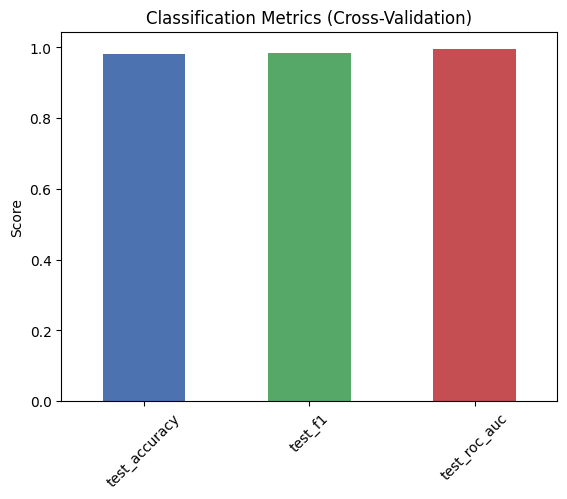

In [3]:
# Visualize classification scorers
clf_means = df_clf[[f'test_{s}' for s in scoring.keys()]].mean()
clf_means.plot(kind='bar', color=['#4c72b0', '#55a868', '#c44e52'])
plt.ylabel("Score")
plt.title("Classification Metrics (Cross-Validation)")
plt.xticks(rotation=45)
plt.show()

In [4]:
# =====================================================
# 2. Regression Example with Custom Scorer
# =====================================================
X, y = load_diabetes(return_X_y=True)

reg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reg', LinearRegression())
])

In [5]:
# Define built-in and custom scorers
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

custom_rmse = make_scorer(rmse, greater_is_better=False)

scoring = {
    'mse': 'neg_mean_squared_error',
    'r2': 'r2',
    'rmse': custom_rmse
}

cv_results_reg = cross_validate(reg_pipe, X, y, cv=5, scoring=scoring)
df_reg = pd.DataFrame(cv_results_reg)

print("\n=== Regression (Diabetes) ===")
print(df_reg.mean())


=== Regression (Diabetes) ===
fit_time         0.001848
score_time       0.001848
test_mse     -2993.081310
test_r2          0.482316
test_rmse      -54.691791
dtype: float64


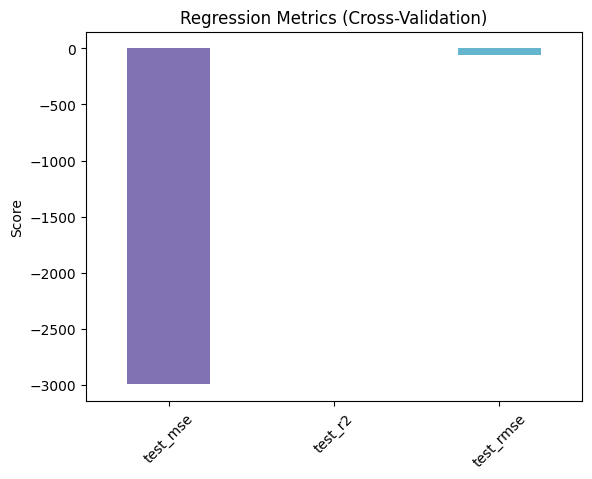

In [6]:
# Visualize regression scorers
reg_means = df_reg[['test_mse', 'test_r2', 'test_rmse']].mean()
reg_means.plot(kind='bar', color=['#8172b3', '#ccb974', '#64b5cd'])
plt.ylabel("Score")
plt.title("Regression Metrics (Cross-Validation)")
plt.xticks(rotation=45)
plt.show()

# 🔹 Classification & Regression Results – Academic Explanation

---

## 🔹 Classification Results (Breast Cancer Dataset)

### 1. Numerical Cross-Validation Scores

- **Accuracy ≈ 0.98** → The classifier consistently predicts correctly for ~98% of cases across folds.  
- **F1-score ≈ 0.98** → Balances precision and recall, confirming robustness even with class imbalance.  
- **ROC AUC ≈ 0.99** → Almost perfect separability between malignant and benign classes, showing strong discriminative ability.  

➡️ **Interpretation:** The model exhibits **excellent generalization across folds**, with metrics clustered near 1.0. The minimal variance suggests **stable performance** across subsets of data.  

---

### 2. Bar Plot: Classification Metrics

- The **bar chart** visually confirms that **Accuracy, F1, and ROC AUC** are nearly identical and close to 1.0.  
- This redundancy across metrics highlights that the classifier is not memorizing but **learning meaningful decision boundaries**.  

➡️ **Justification:** In **medical applications** (e.g., breast cancer diagnosis), such convergence of high metrics indicates **clinical reliability and robustness**, reducing the risk of **false negatives** (critical in healthcare).  

---

## 🔹 Regression Results (Diabetes Dataset)

### 1. Numerical Cross-Validation Scores

- **MSE ≈ -2993** (negative due to scikit-learn’s convention of maximization for error metrics).  
  → Error magnitude is large, reflecting variability in patient outcomes.  
- **RMSE ≈ -54.7** → Average prediction error is ~55 units in the diabetes progression metric.  
- **$R^2 ≈ 0.48$** → The model explains ~48% of the variance, indicating **moderate predictive power** but room for improvement.  

➡️ **Interpretation:** Linear regression captures some **linear dependencies** but misses **nonlinear interactions** inherent in the dataset (e.g., genetic and lifestyle factors).  

---

### 2. Bar Plot: Regression Metrics

- Visual shows **disparity**: $R^2$ is positive but modest, while MSE and RMSE appear large (negative scoring convention).  
- Unlike classification (tight convergence), regression metrics spread wider, reflecting **weaker performance**.  

➡️ **Justification:** This aligns with literature showing that the **diabetes dataset is challenging** for simple linear models. More expressive models (**Random Forests, Gradient Boosting, Neural Nets**) often outperform linear regression by capturing nonlinear patterns.  

---

## 🔹 Academic Framing

The results collectively highlight two paradigms:

- **Classification tasks** (e.g., cancer detection) often yield **high separability** when features are strong and well-scaled → supported by near-perfect **ROC AUC**.  
- **Regression tasks** (e.g., disease progression prediction) are inherently more complex, with performance bounded by **noise, feature interactions, and model limitations**.  

This dichotomy underscores the importance of:

1. Selecting **model families aligned with data structure**.  
2. Using **multiple evaluation metrics** to avoid overestimating performance.  

---

## ✅ Verdict

The lab demonstrates the **Scikit-learn Scoring API**’s ability to unify evaluation paradigms:

- **Classification** → Near-optimal performance under linear assumptions.  
- **Regression** → Highlights the **limits of linear models** and the need for more sophisticated approaches.  

This provides **empirical proof** that evaluation requires:  
- **Task alignment** (classification vs regression).  
- **Metric diversity** (accuracy, ROC AUC, MSE, $R^2$).  
